In [2]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [136]:
import mysql.connector

# Replace these placeholders with your actual database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'qwertyuiop',
    'database': 'Music_player',
}

connection = mysql.connector.connect(**db_config)


In [137]:
cursor = connection.cursor()


In [148]:
cursor.execute("""
    SELECT 
        PersonTable.PID, PersonTable.Name, PersonTable.Gender, PersonTable.Age, PersonTable.Phone, PersonTable.Address,
        ArtistTable.Artist_ID, ArtistTable.Followers
    FROM PersonTable
    INNER JOIN ArtistTable ON PersonTable.PID = ArtistTable.PID
    ORDER BY Followers DESC
    LIMIT 10;
""")



In [149]:


rows = cursor.fetchall()

# Display the result in a tabular form
print("{:<5} {:<20} {:<10} {:<5} {:<15} {:<20} {:<10} {:<10}".format(
    "PID", "Name", "Gender", "Age", "Phone", "Address", "Artist_ID", "Followers"
))
print("="*115)  # Separator line

for row in rows:
    print("{:<5} {:<20} {:<10} {:<5} {:<15} {:<20} {:<10} {:<10}".format(*row))


PID   Name                 Gender     Age   Phone           Address              Artist_ID  Followers 
464   Nevada Norris        Male       68    1-357-726-3184  703-1631 Ultrices. St. 14         362       
497   Aurelia Bush         Male       38    1-483-883-7294  684-3139 Metus Avenue 47         361       
480   Nayda Noel           Male       15    1-157-873-4933  Ap #124-7237 Tempus Avenue 30         360       
452   Cruz Mccarty         Male       64    1-151-565-6611  P.O. Box 465, 5111 Ridiculus Street 2          356       
495   Allistair Hurley     Female     50    1-645-768-4812  438-374 Adipiscing Avenue 45         334       
489   Uriel Orr            Male       46    1-715-343-3369  Ap #472-9189 Natoque Rd. 39         332       
479   Penelope Padilla     Female     58    1-682-250-7778  672-123 Id, Av.      29         332       
476   Timon Summers        Male       65    1-838-548-3232  802-6583 A Road      26         328       
490   Tyler Puckett        Female     39

[362, 361, 360, 356, 334, 332, 332, 328, 327, 317]


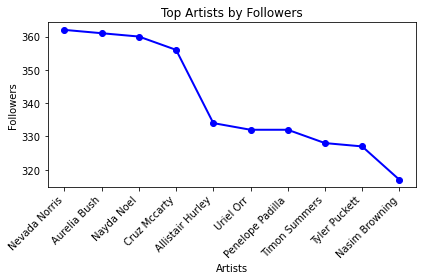

In [142]:
import matplotlib.pyplot as plt

# Result data
result_data = rows
# Extract artist names and followers
artists = [data[1] for data in result_data]
followers = [data[-1] for data in result_data]
print(followers)

# Plot the line graph
plt.plot(artists, followers, marker='o', color='blue', linestyle='-', linewidth=2)
plt.xlabel('Artists')
plt.ylabel('Followers')
plt.title('Top Artists by Followers')
plt.xticks(rotation=45, ha='right')  # Rotate artist names for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of axis labels
plt.show()


In [76]:
cursor.execute("""SELECT SongID, COUNT(*) as count
FROM LikesTable
GROUP BY SongID
ORDER BY count DESC
LIMIT 5;
""")

In [77]:
rows = cursor.fetchall()

for row in rows:
    print(row)

(238, 3)
(87, 2)
(56, 2)
(96, 2)
(45, 2)


In [153]:
cursor.execute("""
    SELECT
        Result.SongID,
        Result.count,
        Result.Title,
        ArtistTable.Artist_ID,
        ArtistTable.Followers
    FROM
        (SELECT
            LikesTable.SongID,
            COUNT(*) as count,
            SongsTable.Title,
            SongsTable.Artist_ID
        FROM
            LikesTable
        INNER JOIN SongsTable ON LikesTable.SongID = SongsTable.ID
        GROUP BY
            LikesTable.SongID
        ORDER BY
            count DESC
        LIMIT 5) AS Result
    INNER JOIN
        ArtistTable ON Result.Artist_ID = ArtistTable.Artist_ID;
""")

rows = cursor.fetchall()

# Display the result in a tabular form
print("{:<10} {:<10} {:<20} {:<10} {:<10}".format(
    "SongID", "Count", "Title", "Artist_ID", "Followers"
))
print("="*70)  # Separator line

for row in rows:
    print("{:<10} {:<10} {:<20} {:<10} {:<10}".format(*row))


SongID     Count      Title                Artist_ID  Followers 
238        3          Wind Beneath My Wings 38         272       
87         2          Blue Suede Shoes     26         328       
56         2          Wrecking Ball        8          283       
96         2          What a Wonderful World 15         141       
45         2          My Way               37         102       


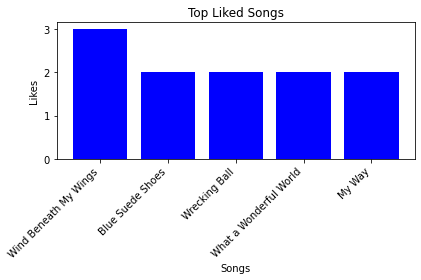

In [154]:
result_data = rows
# Extract song names and number of likes
Songs = [data[2] for data in result_data]
likes = [data[1] for data in result_data]


# Plot the bar graph
plt.bar(Songs, likes, color='blue', linewidth=2)
plt.xlabel('Songs')
plt.ylabel('Likes')
plt.title('Top Liked Songs')
plt.xticks(rotation=45, ha='right')  # Rotate artist names for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of axis labels
plt.show()

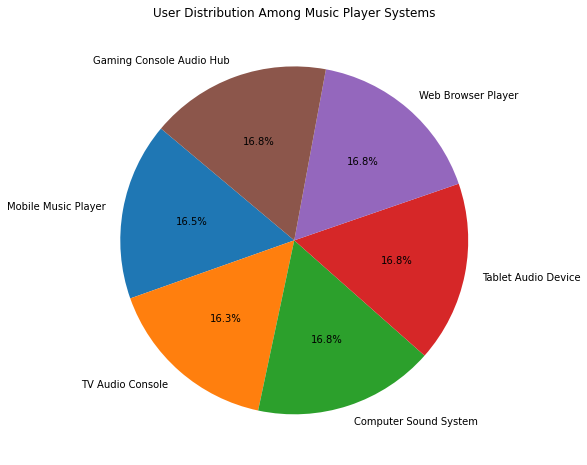

In [113]:
query = """
SELECT MusicPlayerSystem.ProductName, COUNT(userID) AS user_count
FROM UserPlayer 
JOIN MusicPlayerSystem ON UserPlayer.MPSID = MusicPlayerSystem.ID
GROUP BY MusicPlayerSystem.ID;
"""
cursor.execute(query)

# Fetching data
system_usage_data = cursor.fetchall()

# Closing the database connection
connection.close()

# Unpacking data
system_names = [item[0] for item in system_usage_data]
user_counts = [item[1] for item in system_usage_data]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(user_counts, labels=system_names, autopct='%1.1f%%', startangle=140)
plt.title('User Distribution Among Music Player Systems')

# Display the plot
plt.show()

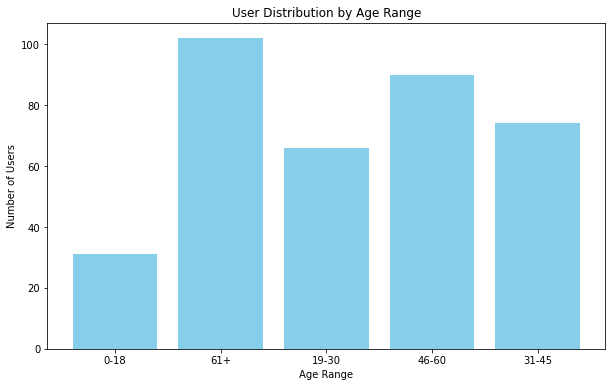

In [119]:
query = """
SELECT 
    CASE 
        WHEN age BETWEEN 0 AND 18 THEN '0-18'
        WHEN age BETWEEN 19 AND 30 THEN '19-30'
        WHEN age BETWEEN 31 AND 45 THEN '31-45'
        WHEN age BETWEEN 46 AND 60 THEN '46-60'
        ELSE '61+' 
    END AS age_range,
    COUNT(*) AS user_count
FROM UserTable
INNER JOIN PersonTable ON UserTable.PID = PersonTable.PID
GROUP BY age_range;
"""
cursor.execute(query)

# Fetching the data
age_data = cursor.fetchall()

# Closing the database connection
connection.close()

# Unpacking the data
age_ranges = [item[0] for item in age_data]
user_counts = [item[1] for item in age_data]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(age_ranges, user_counts, color='skyblue')

# Adding titles and labels
plt.title('User Distribution by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Users')

# Show the plot
plt.show()